<a href="https://colab.research.google.com/github/Nirbhayberi/Coursera_Capstone/blob/master/applied_capstrone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_excel(r"/content/restaurant .xlsx" )

In [ ]:
df.head()

,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892


In [ ]:
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])

In [ ]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [ ]:
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])

In [ ]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [ ]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.962339620312497 77.60175294687502


In [ ]:
CLIENT_ID = 'ZK40VO3EPO1ZY5C04PNYSMQH2ZFZ3U1TPL0QME3WEY553DMH'
CLIENT_SECRET = 'RQBRNE2T3OTMYY4BBJ3YWLS0P2FK413O22MQV1QHBHAD04WG'
VERSION = '20180606'
LIMIT = 150

In [ ]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()

In [ ]:
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [ ]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [ ]:
borough_colors

{'Central': '#556383',
 'Eastern': '#90778E',
 'NorthEastern': '#4465DF',
 'Northern': '#CD711B',
 'SouthEastern': '#4447D9',
 'Southern': '#1AE6F5',
 'SouthernSuburbs': '#2CBAE2',
 'Western': '#284164'}

In [ ]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [ ]:


for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)

In [ ]:
bangalore_map

In [ ]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

In [ ]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [ ]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  592


In [ ]:
bangalore_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
2,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
3,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
4,Cantonment area,Central,12.972442,77.580643,Kamat Yatrinivas,12.975985,77.578125,Indian Restaurant


In [ ]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       116
Fast Food Restaurant     29
Café                     26
Bakery                   24
Ice Cream Shop           24
Department Store         20
Pizza Place              18
Coffee Shop              18
Hotel                    13
Chinese Restaurant       13
Name: Neighborhood, dtype: int64

In [ ]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  129


In [ ]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [ ]:
individual_bangalore_venue_count

Borough
Borough Neighborhood                 
Central Cantonment area             5
        Domlur                     11
        Indiranagar                65
        Jeevanbheemanagar           6
        Malleswaram                 6
...                               ...
Western Nagarbhavi                  5
        Nandini Layout              1
        Nayandahalli                4
        Rajarajeshwari Nagar        6
        Vijayanagar                 3

[63 rows x 1 columns]

In [ ]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [ ]:
individual_bangalore_venue_count.reset_index(inplace=True)

In [ ]:
individual_bangalore_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,5
1,Central,Domlur,11
2,Central,Indiranagar,65
3,Central,Jeevanbheemanagar,6
4,Central,Malleswaram,6
...,...,...,...
58,Western,Nagarbhavi,5
59,Western,Nandini Layout,1
60,Western,Nayandahalli,4
61,Western,Rajarajeshwari Nagar,6


[Text(0, 0, 'Cantonment area'),
 Text(0, 0, 'Domlur'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jeevanbheemanagar'),
 Text(0, 0, 'Malleswaram'),
 Text(0, 0, 'Pete area'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Sadashivanagar'),
 Text(0, 0, 'Seshadripuram'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Ulsoor'),
 Text(0, 0, 'Vasanth Nagar'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'CV Raman Nagar'),
 Text(0, 0, 'Hoodi'),
 Text(0, 0, 'Krishnarajapuram'),
 Text(0, 0, 'Mahadevapura'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'Varthur'),
 Text(0, 0, 'Whitefield'),
 Text(0, 0, 'Banaswadi'),
 Text(0, 0, 'HBR Layout'),
 Text(0, 0, 'Horamavu'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Lingarajapuram'),
 Text(0, 0, 'Ramamurthy Nagar'),
 Text(0, 0, 'Hebbal'),
 Text(0, 0, 'Jalahalli'),
 Text(0, 0, 'Mathikere'),
 Text(0, 0, 'R. T. Nagar'),
 Text(0, 0, 'Vidyaranyapura'),
 Text(0, 0, 'Yelahanka'),
 Text(0, 0, 'Yeshwanthpur'),
 Text(0, 0, 'BTM Layout'),
 Text(0, 0, 'Bommanahalli'),
 Text(0, 0, 'Bommasan

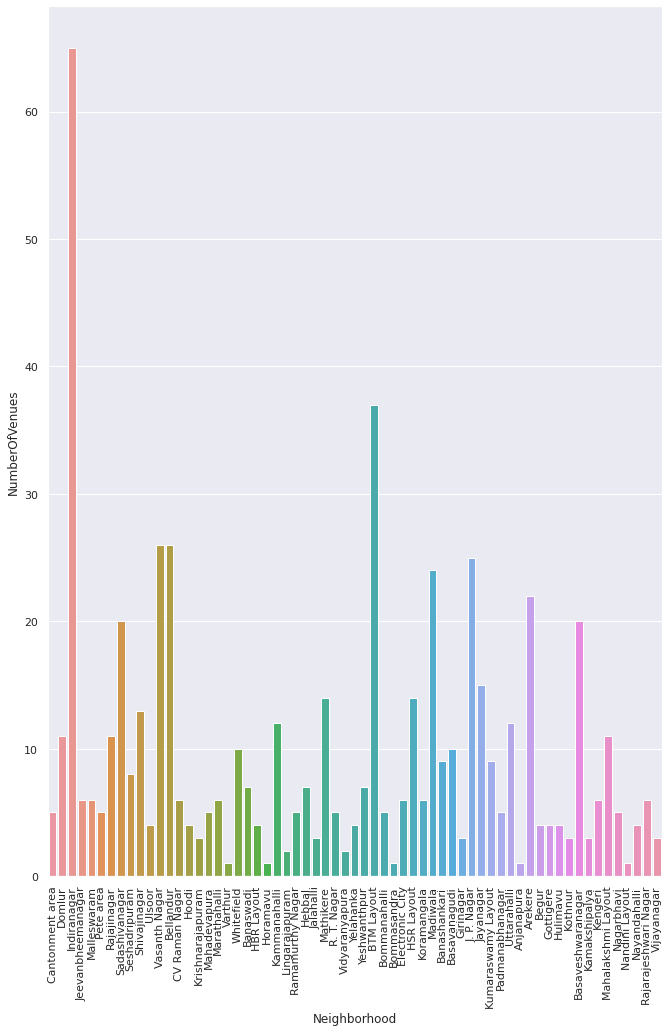

In [ ]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

In [ ]:
bangalore_venues[bangalore_venues['Neighborhood']=='Whitefield']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
231,Whitefield,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
232,Whitefield,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
233,Whitefield,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
234,Whitefield,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
235,Whitefield,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
236,Whitefield,Eastern,12.9698,77.7499,Punjabi Kitchen,12.968100,77.749804,Diner
237,Whitefield,Eastern,12.9698,77.7499,Cult - The Workout Station Whitefield,12.968434,77.749597,Gym / Fitness Center
238,Whitefield,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
239,Whitefield,Eastern,12.9698,77.7499,Fabindia,12.972156,77.750447,Market
240,Whitefield,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café


In [ ]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])

In [ ]:

bangalore_venues_onehot

,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,Venue Category_Basketball Court,Venue Category_Bengali Restaurant,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Business Service,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,Venue Category_Clothing Store,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_Convenience Store,Venue Category_Cupcake Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,Venue Category_Fast Food Restaurant,...,Venue Category_North Indian Restaurant,Venue Category_Optical Shop,Venue Category_Outlet Store,Venue Category_Paintball Field,Venue Category_Park,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Resort,Venue Category_Restaurant,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Spa,Venue Category_Sporting Goods Shop,Venue Category_Sports Bar,Venue Category_Steakhouse,Venue Category_Supermarket,Venue Category_Sushi Restaurant,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
588,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
590,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,Venue Category_Basketball Court,Venue Category_Bengali Restaurant,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Business Service,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,Venue Category_Clothing Store,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_Convenience Store,Venue Category_Cupcake Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,...,Venue Category_North Indian Restaurant,Venue Category_Optical Shop,Venue Category_Outlet Store,Venue Category_Paintball Field,Venue Category_Park,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Resort,Venue Category_Restaurant,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Spa,Venue Category_Sporting Goods Shop,Venue Category_Sports Bar,Venue Category_Steakhouse,Venue Category_Supermarket,Venue Category_Sushi Restaurant,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0
1,Arekere,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.000000,0.045455,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.045455,0.000000,0.0,0.045455,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.045455,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.181818,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0
2,BTM Layout,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.054054,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.027027,0.0,0.054054,0.0,0.000000,0.0,0.081081,0.0,0.0,0.0,0.027027,0.0,0.027027,0.0,0.0,0.0,0.027027,0.0,...,0.000000,0.0,0.0,0.0,0.027027,0.0,0.000000,0.054054,0.0,0.0,0.0,0.0,0.0,0.0,0.027027,0.0,0.054054,0.000000,0.000000,0.0,0.0,0.00,0.081081,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.054054,0.0,0.0,0.0
3,Banashankari,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.222222,0.0,0.000000,0.0,0.111111,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.111111,0.0,0.0,0.0,0.000000,0.0,0.000000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.111111,0.0

In [ ]:
number_of_top_venues = 5

In [ ]:
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Anjanapura ---------
                                  Venue  Frequency
0                    Venue Category_ATM        1.0
1      Venue Category_Indian Restaurant        0.0
2               Venue Category_Pharmacy        0.0
3  Venue Category_Performing Arts Venue        0.0
4                   Venue Category_Park        0.0


--------- Arekere ---------
                                Venue  Frequency
0  Venue Category_Sporting Goods Shop       0.18
1    Venue Category_Indian Restaurant       0.14
2          Venue Category_Pizza Place       0.09
3          Venue Category_Supermarket       0.05
4   Venue Category_Chinese Restaurant       0.05


--------- BTM Layout ---------
                                          Venue  Frequency
0              Venue Category_Indian Restaurant       0.22
1                 Venue Category_Ice Cream Shop       0.08
2                    Venue Category_Coffee Shop       0.08
3                    Venue Category_Snack Place       0.08
4  Venue Ca

In [ ]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [ ]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

In [ ]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anjanapura,Venue Category_ATM,Venue Category_Ice Cream Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Fish & Chips Shop
1,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Bar,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Supermarket
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Coffee Shop,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Chinese Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Bakery,Venue Category_Pizza Place
3,Banashankari,Venue Category_Café,Venue Category_Clothing Store,Venue Category_Shoe Store,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_North Indian Restaurant,Venue Category_Motorcycle Shop,Venue Category_Fried Chicken Joint,Venue Category_Fish & Chips Shop,Venue Category_Fishing Store
4,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Pharmacy,Venue Category_Bakery,Venue Category_Market,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Hookah Bar,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant


In [ ]:
neighborhoods_venues_sorted.shape

(63, 11)

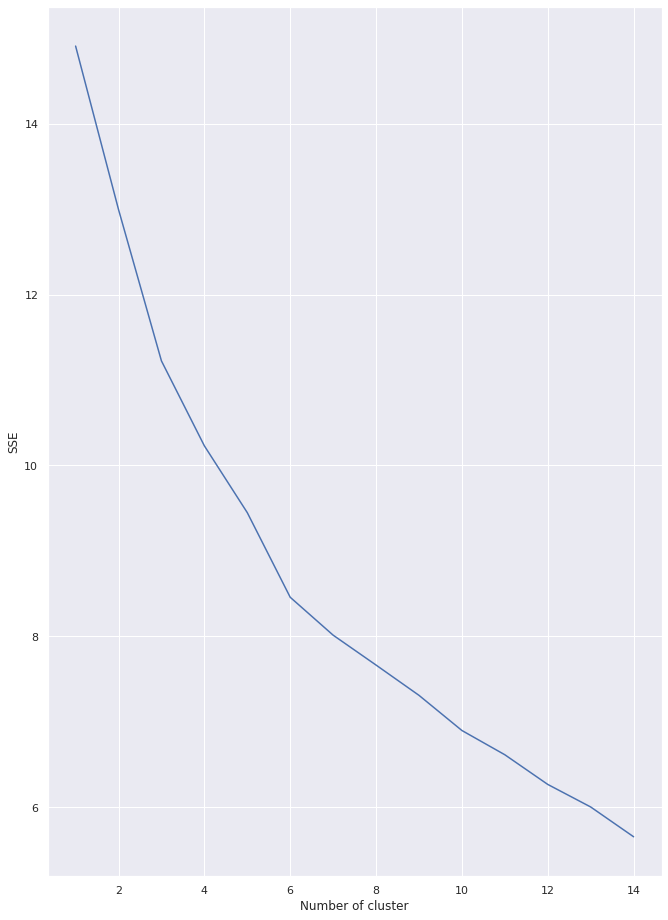

In [ ]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [ ]:
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_

In [ ]:
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    22
1    12
2     4
3     8
4    17
Name: Neighborhood, dtype: int64

In [ ]:
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Andhra Restaurant', 'Venue Category_Art Museum',
       'Venue Category_Asian Restaurant', 'Venue Category_Athletics & Sports',
       'Venue Category_Auto Garage', 'Venue Category_BBQ Joint',
       'Venue Category_Badminton Court', 'Venue Category_Bakery',
       ...
       'Venue Category_Tex-Mex Restaurant', 'Venue Category_Toll Plaza',
       'Venue Category_Toy / Game Store', 'Venue Category_Train Station',
       'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Women's Store',
       'Venue Category_Yoga Studio', 'Cluster'],
      dtype='object', length=131)

In [ ]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')

In [ ]:
neighborhoods_venues_sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,Venue Category_Basketball Court,Venue Category_Bengali Restaurant,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Business Service,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,Venue Category_Clothing Store,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_Convenience Store,...,Venue Category_Optical Shop,Venue Category_Outlet Store,Venue Category_Paintball Field,Venue Category_Park,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Resort,Venue Category_Restaurant,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Spa,Venue Category_Sporting Goods Shop,Venue Category_Sports Bar,Venue Category_Steakhouse,Venue Category_Supermarket,Venue Category_Sushi Restaurant,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,Venue Category_ATM,Venue Category_Ice Cream Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Fish & Chips Shop,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,3
1,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Bar,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Supermarket,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.000000,0.045455,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.045455,0.000000,0.0,0.045455,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.181818,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Coffee Shop,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Chinese Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Bakery,Venue Category_Pizza Place,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.054054,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.027027,0.0,0.054054,0.0,0.00

In [ ]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')

In [ ]:
# create map
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

In [ ]:
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [ ]:
map_clusters

In [ ]:

bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [ ]:

bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [ ]:

bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [ ]:
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099792,0.293051
1,Central,Domlur,56837.022198,0.879225
2,Central,Indiranagar,41991.817435,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063892,0.824047


In [ ]:


bangalore_venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,Venue Category_Basketball Court,Venue Category_Bengali Restaurant,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Business Service,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,Venue Category_Clothing Store,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_Convenience Store,Venue Category_Cupcake Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,...,Venue Category_Optical Shop,Venue Category_Outlet Store,Venue Category_Paintball Field,Venue Category_Park,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Resort,Venue Category_Restaurant,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Spa,Venue Category_Sporting Goods Shop,Venue Category_Sports Bar,Venue Category_Steakhouse,Venue Category_Supermarket,Venue Category_Sushi Restaurant,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [ ]:
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,Venue Category_Basketball Court,Venue Category_Bengali Restaurant,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Business Service,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,Venue Category_Clothing Store,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_Convenience Store,Venue Category_Cupcake Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,...,Venue Category_North Indian Restaurant,Venue Category_Optical Shop,Venue Category_Outlet Store,Venue Category_Paintball Field,Venue Category_Park,Venue Category_Performing Arts Venue,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Resort,Venue Category_Restaurant,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Spa,Venue Category_Sporting Goods Shop,Venue Category_Sports Bar,Venue Category_Steakhouse,Venue Category_Supermarket,Venue Category_Sushi Restaurant,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Arekere,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,BTM Layout,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,3,0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,2,0,0,0,0,0,0,1,0,2,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
3,Banashankari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Banaswadi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     0
1     0
2     2
3     0
4     1
     ..
58    0
59    0
60    0
61    0
62    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 63, dtype: uint8

In [ ]:
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [ ]:

bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [ ]:
bangalore_veg.head()

,Neighborhood,NumberOfVegRestaurants
0,Anjanapura,0
1,Arekere,0
2,BTM Layout,2
3,Banashankari,0
4,Banaswadi,1


In [ ]:

bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))

In [ ]:
bangalore_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Anjanapura,0,1.0
1,Arekere,0,1.0
2,BTM Layout,2,0.0
3,Banashankari,0,1.0
4,Banaswadi,1,0.5
5,Basavanagudi,0,1.0
6,Basaveshwaranagar,0,1.0
7,Begur,0,1.0
8,Bellandur,0,1.0
9,Bommanahalli,0,1.0


In [ ]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

In [ ]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Whitefield']

In [ ]:

target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,Venue Category_Basketball Court,Venue Category_Bengali Restaurant,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Business Service,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,Venue Category_Clothing Store,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,...,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Resort,Venue Category_Restaurant,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Spa,Venue Category_Sporting Goods Shop,Venue Category_Sports Bar,Venue Category_Steakhouse,Venue Category_Supermarket,Venue Category_Sushi Restaurant,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,571,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Diner,Venue Category_Café,Venue Category_Market,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Hotel,Venue Category_Hotel Bar,Venue Category_Electronics Store,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
1,572,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Diner,Venue Category_Café,Venue Category_Market,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Hotel,Venue Category_Hotel Bar,Venue Category_Electronics Store,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
2,573,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Diner,Venue Category_Café,Venue Category_Market,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Hotel,Venue Category_Hotel Bar,Venue Category_Electronics Store,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
3,574,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Diner,Venue Category_Café,Venue Catego

In [ ]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [ ]:
target_cluster

0

In [ ]:
print("The target cluster is : ",target_cluster)

The target cluster is :  0


In [ ]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,Venue Category_Basketball Court,Venue Category_Bengali Restaurant,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Business Service,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,Venue Category_Clothing Store,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_Convenience Store,...,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Resort,Venue Category_Restaurant,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Spa,Venue Category_Sporting Goods Shop,Venue Category_Sports Bar,Venue Category_Steakhouse,Venue Category_Supermarket,Venue Category_Sushi Restaurant,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Bar,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Supermarket,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop
2,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Bar,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Supermarket,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Guru Garden,12.891196,77.597979,Indian Restaurant
3,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Bar,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Supermarket,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.

In [ ]:
print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))

There are 303 neighborhoods which has similar characteristics to Whitefield.


In [ ]:
possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,Venue Category_Basketball Court,Venue Category_Bengali Restaurant,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Business Service,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,Venue Category_Clothing Store,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,...,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pub,Venue Category_Punjabi Restaurant,Venue Category_Rajasthani Restaurant,Venue Category_Resort,Venue Category_Restaurant,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Spa,Venue Category_Sporting Goods Shop,Venue Category_Sports Bar,Venue Category_Steakhouse,Venue Category_Supermarket,Venue Category_Sushi Restaurant,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Bar,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Supermarket,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop
1,2,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Bar,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Supermarket,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Guru Garden,12.891196,77.597979,Indian Restaurant
2,3,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Bar,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Supermarket,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:

possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [ ]:
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,Venue Category_Basketball Court,Venue Category_Bengali Restaurant,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Business Service,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,Venue Category_Clothing Store,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_Convenience Store,...,Venue Category_Restaurant,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Spa,Venue Category_Sporting Goods Shop,Venue Category_Sports Bar,Venue Category_Steakhouse,Venue Category_Supermarket,Venue Category_Sushi Restaurant,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Bar,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Supermarket,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop,138760,0.141072,29378.716626,0.454466,0,1.0
1,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Bar,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Supermarket,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Guru Garden,12.891196,77.597979,Indian Restaurant,138760,0.141072,29378.716626,0.454466,0,1.0
2,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Bar,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Supermarket,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0

In [ ]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [ ]:
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,Venue Category_Basketball Court,Venue Category_Bengali Restaurant,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Business Service,Venue Category_Café,Venue Category_Chaat Place,Venue Category_Chinese Restaurant,Venue Category_Chocolate Shop,Venue Category_Clothing Store,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_Convenience Store,...,Venue Category_Road,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Spa,Venue Category_Sporting Goods Shop,Venue Category_Sports Bar,Venue Category_Steakhouse,Venue Category_Supermarket,Venue Category_Sushi Restaurant,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Banashankari,Venue Category_Café,Venue Category_Clothing Store,Venue Category_Shoe Store,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_North Indian Restaurant,Venue Category_Motorcycle Shop,Venue Category_Fried Chicken Joint,Venue Category_Fish & Chips Shop,Venue Category_Fishing Store,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,...,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Southern,12.9255,77.5468,Anna Kuteera,12.926094,77.550367,Indian Restaurant,810407,0.823908,57524.209528,0.889855,0,1.0,0.823403
1,Banashankari,Venue Category_Café,Venue Category_Clothing Store,Venue Category_Shoe Store,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_North Indian Restaurant,Venue Category_Motorcycle Shop,Venue Category_Fried Chicken Joint,Venue Category_Fish & Chips Shop,Venue Category_Fishing Store,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,...,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Southern,12.9255,77.5468,cafe coffee day,12.924896,77.545873,Café,810407,0.823908,57524.209528,0.889855,0,1.0,0.823403
2,Banashankari,Venue Category_Café,Venue Category_Clothing Store,Venue Category_Shoe Store,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_North Indian Restaurant,Venue Category_Motorcycle Shop,Venue Category_Fried Chicken Joint,Venue Category_Fish & Chips Shop,Venue Category_Fishing Store,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,...,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Southern,12.9255,77.5468,Puma store banshankri,12.926899,77.550973,Shoe

In [ ]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [ ]:
top3_df = pd.DataFrame(top3).reset_index()

In [ ]:
top3_df.head(3)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Pizza Place,[0.32959888840700624]
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Coffee Shop,Venue Category_Ice Cream Shop,[0.6918117751640321]
2,Banashankari,Venue Category_Café,Venue Category_Clothing Store,Venue Category_Shoe Store,[0.8234029969357847]


***Here, according the data, we see that 'Arekere,BTM layout,Banashanki' are top 3 neighborhoods to find similar food to whitefield restaurant's veg food***
